In [1]:
# Simple Linear Regression
# Importing the libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# importing the dataset
df = pd.read_csv('Salary_Data.csv')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
# Extracting features (all rows, all columns except the last one)
X = df.iloc[:,:-1].values

# Extracting the target variable (all rows, last column)
y = df.iloc[:,-1].values

In [16]:
# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
# X and y are assumed to be your feature and target variables
# test_size=1/3 means that 33.33% of the data will be used for testing
# random_state=0 ensures reproducibility of the data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [18]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training features and target variable
regressor = LinearRegression()

# Training the model using the fit method
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

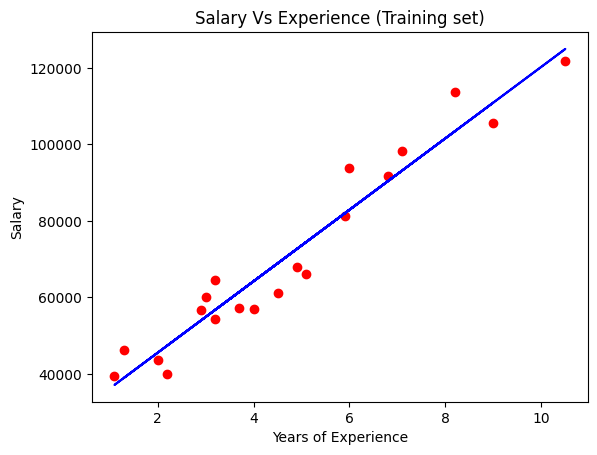

In [25]:
# Visualising the Training set results

# Scatter plot of the actual training data points
plt.scatter(X_train, y_train, color='red')

# Plotting the regression line based on the predictions made by the model on the training data
plt.plot(X_train, regressor.predict(X_train),color = 'blue')

plt.title('Salary Vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

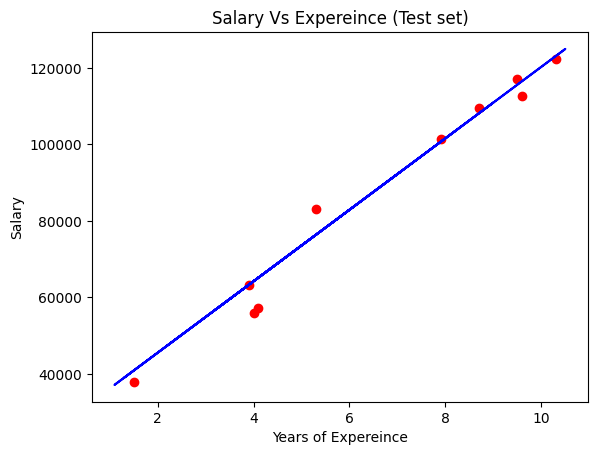

In [28]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary Vs Expereince (Test set)')
plt.xlabel('Years of Expereince')
plt.ylabel('Salary')
plt.show()


### Training Data

In [33]:
import plotly.graph_objects as go

# Scatter plot for training data
scatter_train = go.Scatter(x=X_train.flatten(), y=y_train, mode='markers', marker=dict(color='red'), name='Actual Data')

# Line trace for the regression line
line_reg = go.Scatter(x=X_train.flatten(), y=regressor.predict(X_train), mode='lines', line=dict(color='blue'), name='Regression Line')

# Create layout with title and axis labels
layout = go.Layout(title='Salary Vs Experience (Training set)', xaxis=dict(title='Years of Experience'), yaxis=dict(title='Salary'))

# Create a figure
fig = go.Figure(data=[scatter_train, line_reg], layout=layout)

# Show the figure
fig.show()


### Test Data

In [38]:
import plotly.graph_objects as go

# Assuming X_test and y_test are your test features and target variable
# Assuming X_train is the same as in the training set

# Scatter plot of the actual test data points
scatter = go.Scatter(x=X_test.flatten(), y=y_test, mode='markers', marker=dict(color='red'),
                    name='Actual Data', text=['Years: {}<br>Salary: {}'.format(x, y) for x, y in zip(X_test.flatten(), y_test)])

# Plotting the regression line based on the predictions made by the model on the training data
line = go.Scatter(x=X_train.flatten(), y=regressor.predict(X_train), mode='lines', line=dict(color='blue', dash='dash'),
                 name='Regression Line')

# Create layout
layout = go.Layout(title='Salary Vs Experience (Test set)', xaxis=dict(title='Years of Experience'), yaxis=dict(title='Salary'))

# Create figure
fig = go.Figure(data=[scatter, line], layout=layout)

# Show the plot
fig.show()
